<a href="https://colab.research.google.com/github/HumbertoSM-DataScience/Thermodynamics/blob/main/Trab3_Gases_Reais/Termo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate as spit
from scipy.signal import argrelextrema

Constantes de van der Waals (fonte https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_de_Van_der_Waals)

| Gás | a (litro²•atm/mol²) | b (litro/mol) |
|:---:|:-------------------:|:-------------:|
| H2  | 0.2444              | 0.02661       |
| He  | 0.03412             | 0.02370       |
| N2  | 1.390               | 0.03913       |
| O2  | 1.360               | 0.03183       |
| CO  | 1.485               | 0.03985       |
| NO  | 1.340               | 0.02789       |
| CO2 | 3.592               | 0.04267       |
| H2O | 5.464               | 0.03049       |


R = 0,0820574587 	L · atm · K^−1 · mol^−1

In [ ]:
# Determinar a Temperatura Crítica (Tc) para o gás da VDW
# Para o Gás O2
a = 1.360
b = 0.03183
R = 0.0820574587
Tc = 8*a/(27*R*b)
Pc = a/(27*b**2)
Vc = 3*b

In [ ]:
# Define a equação de estado reduzida para o gás de Van der Waals
def pVDW(V,T):
  p = (8*T/(3*V-1))-3/(V**2)
  return p
vpVDW = np.vectorize(pVDW) # Vetoriza a funcao para ser usada no pacote numpy

In [ ]:
# Inicializa as variáveis V e T e constrói o conjunto da variável p(V,T)
V = np.linspace(0.25,3,20000)
T = np.linspace(0,1,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpVDW(V,t))


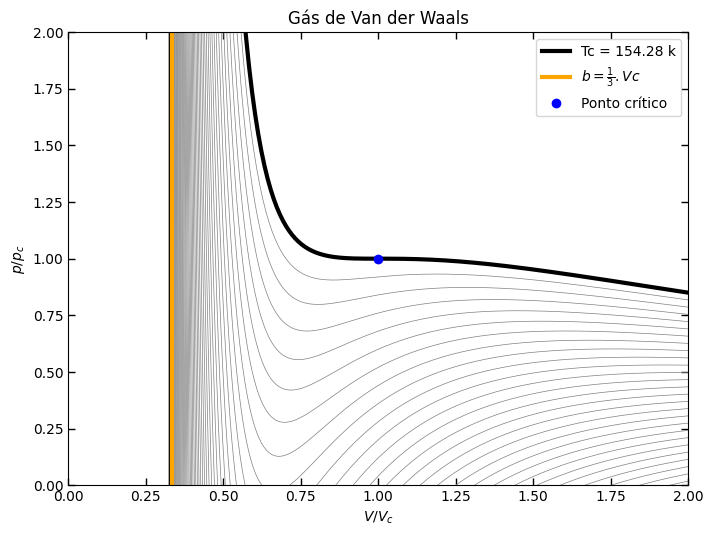

In [ ]:
# Plota o resultado
fig,ax  = plt.subplots(figsize=(8,6),dpi=100)
ax.set(ylim=(0,2),xlim=(0,2))
ax.set(xlabel=r'$V/V_c$',ylabel=r'$p/p_c$',title='Gás de Van der Waals')
for i in range(len(res)):
  ax.plot(V,res[i],c='gray',lw=0.5)
ax.tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax.plot(V,vpVDW(V,1.),c='k',lw=3,label=f'Tc = {Tc:.2f} k')
ax.axvline(x=1/3, label=r'$b = \frac{1}{3} . Vc$', c='orange',lw=3)
ax.plot(1.,1.,'o',c='b',label=f'Ponto crítico')
ax.legend(loc='upper right')
plt.savefig('fig1 - isotermas',dpi=100)

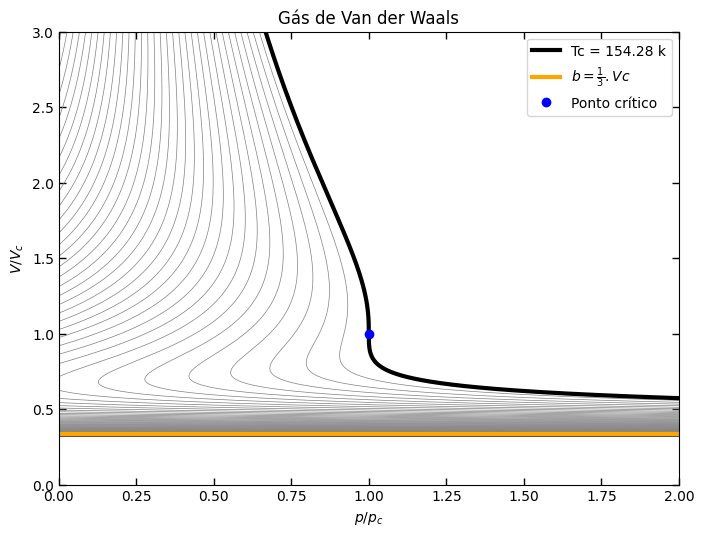

In [ ]:
#Plota o resultado com eixos espelhados (IGNORAR NO ARTIGO)

fig,ax  = plt.subplots(figsize=(8,6),dpi=100)
ax.set(ylim=(0,3),xlim=(0,2))
ax.set(ylabel=r'$V/V_c$',xlabel=r'$p/p_c$',title='Gás de Van der Waals')
for i in range(len(res)):
  ax.plot(res[i],V,c='gray',lw=0.5)
ax.tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax.plot(vpVDW(V,1.),V,c='k',lw=3,label=f'Tc = {Tc:.2f} k')
ax.axhline(y=1/3, label=r'$b = \frac{1}{3} . Vc$', c='orange',lw=3)
ax.plot(1.,1.,'o',c='b',label=f'Ponto crítico')
ax.legend(loc='upper right')

In [ ]:
# Redefine as variáveis e escolhemos um T específico
V = np.linspace(0.25,3,30000)
T = np.linspace(0,1,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpVDW(V,t))
t = 45
# Inverte a ordem das listas, necessário para integração numérica
rev_V = (V)
rev_p = (res[t])
print(T[t])
# Realiza a integração numérica
resI=[]
for i,v in enumerate(rev_V):
  resI.append(spit.trapz(rev_V[0:i],rev_p[0:i]))
# Encontra os pontos extremos X e Y
imax = argrelextrema(rev_p, np.greater)
imin = argrelextrema(rev_p, np.less)
# Encontra os pontos B
idx=[]
erro_min = 1e5
for i,g in enumerate(resI[0:imax[0][0]]):
  for k,gg in enumerate(resI[imin[0][0]:]):
    erro = (gg-g)**2 + (-rev_p[i]+rev_p[k+imin[0][0]])**2
    if erro < erro_min:
      erro_min=erro
      idx.append((i,k+imin[0][0],erro_min,abs(gg-g),abs(-rev_p[i]+rev_p[k+imin[0][0]])))
idx
bidx = idx[-1]
print(bidx)

0.9
(31, 5112, 9892.877613788662, 62.758566655192425, 77.16372156120019)


In [ ]:
resI

[0.0,
 0.0,
 0.0008666280594441399,
 0.0017064096259112086,
 0.002519281022714728,
 0.003305178242968626,
 0.0040640369477826024,
 0.004795792464501232,
 0.005500379784897865,
 0.006177733563373118,
 0.006827788115111633,
 0.007450477414264758,
 0.00804573509210215,
 0.00861349443515008,
 0.009153688383312833,
 0.009666249528002187,
 0.01015111011021426,
 0.010608202018642933,
 0.011037456787744187,
 0.011438805595797684,
 0.011812179262954905,
 0.012157508249277381,
 0.012474722652761417,
 0.012763752207349304,
 0.013024526280909063,
 0.013256973873214922,
 0.01346102361393571,
 0.013636603760580963,
 0.013783642196408274,
 0.013902066428392259,
 0.013991803585104533,
 0.014052780414622998,
 0.014084923282402264,
 0.014088158169141055,
 0.014062410668639422,
 0.014007605985627761,
 0.013923668933581962,
 0.01381052393256067,
 0.013668095006942292,
 0.013496305783241631,
 0.01329507948785499,
 0.013064338944802082,
 0.012804006573446726,
 0.012514004386217931,
 0.012194253986298888,
 0

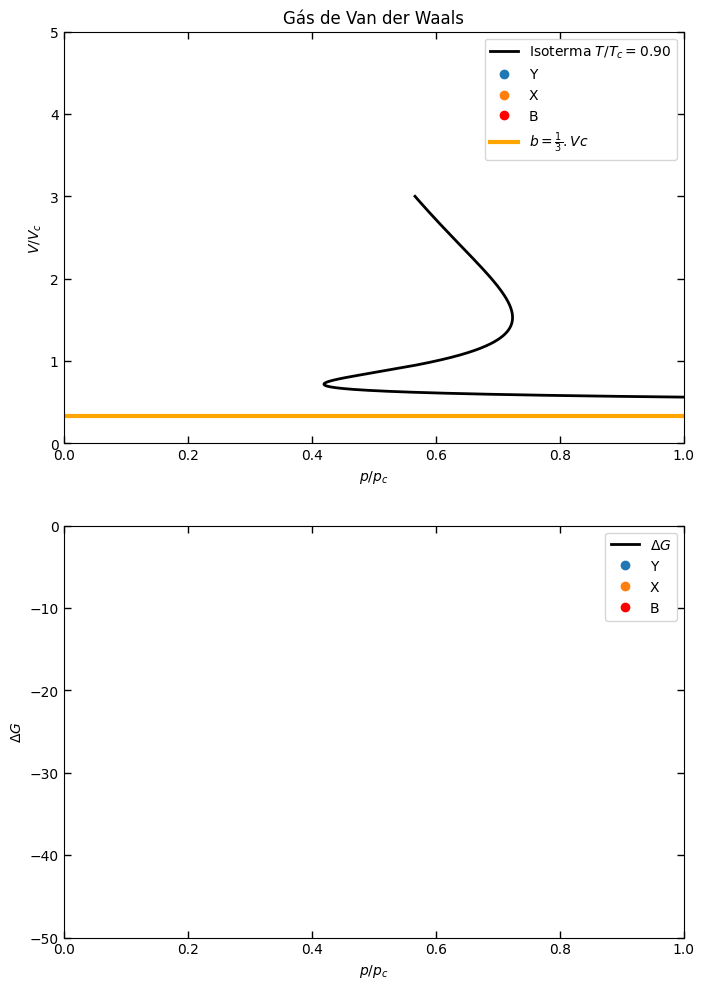

In [ ]:

# Plota os gráficos de V por p e de G por p
fig,ax  = plt.subplots(2,1,figsize=(8,12),dpi=100)
i,k,_,_,_ = bidx
ax[0].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax[0].set(ylabel=r'$V/V_c$',xlabel=r'$p/p_c$',title='Gás de Van der Waals')
ax[0].plot(rev_p,rev_V,c='k',lw=2,label=fr'Isoterma $T/T_c = {T[t]:.2f}$')
#ax[0].plot(rev_p,rev_V,'ok',ms = 0.5,label=fr'Isoterma $T/T_c = {T[t]}$')
ax[0].plot(rev_p[imax[0][0]],rev_V[imax[0][0]],'o',label=f'Y')
ax[0].plot(rev_p[imin[0][0]],rev_V[imin[0][0]],'o',label=f'X')
ax[0].plot(rev_p[i],rev_V[i],'or',label=f'B')
ax[0].plot(rev_p[i],rev_V[k],'or')
ax[0].axvline(x=rev_p[imax[0][0]],ls='--',lw=1)
ax[0].axvline(x=rev_p[imin[0][0]],ls='--',lw=1)
ax[0].axvline(x=rev_p[i],ls='--',lw=1)
ax[0].axhline(y=1/3, label=r'$b = \frac{1}{3} . Vc$', c='orange',lw=3)
ax[0].legend()

ax[1].set(ylim=(0,1),xlim=(0.5,1))
ax[1].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax[1].plot(rev_p,resI,c='k',lw=2,label=fr'$\Delta G$')
#ax[1].plot(rev_p,resI,'ok',ms=0.5,label=fr'$\Delta G$')
ax[1].plot(rev_p[imax[0][0]],resI[imax[0][0]],'o',label=f'Y')
ax[1].plot(rev_p[imin[0][0]],resI[imin[0][0]],'o',label=f'X')
ax[1].plot(rev_p[i],resI[i],'or',label='B')
ax[1].axvline(x=rev_p[imax[0][0]],ls='--',lw=1)
ax[1].axvline(x=rev_p[imin[0][0]],ls='--',lw=1)
ax[1].axvline(x=rev_p[i],ls='--',lw=1)
ax[1].set(ylabel=r'$\Delta G$',xlabel=r'$p/p_c$')
ax[1].legend()
# Pode ser necessário ajuste manual dos limites do gráfico para ótima apresentação
xmin = 0
xmax = 1
yminV = 0
ymaxV = 5
yminG = -50
ymaxG = 0
ax[0].set(ylim=(yminV,ymaxV),xlim=(xmin,xmax))
ax[1].set(ylim=(yminG,ymaxG),xlim=(xmin,xmax))
plt.savefig(f'fig2 - G por P T = {int(T[t]*100)}',dpi=100)

In [ ]:
# Nesta parte é repetido o código anterior, porém calculando para uma faixa de valores de T
V = np.linspace(0.25,50,30000)
T = np.linspace(0,1,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpVDW(V,t))

  
tt = range(25,50)
Bidx=[]
for t in tt:
  rev_V = np.flip(V)
  rev_p = np.flip(res[t])
  resI=[]
  for i,v in enumerate(rev_V):
    resI.append(spit.trapz(rev_V[0:i],rev_p[0:i]))
  imax = argrelextrema(rev_p, np.greater)
  imin = argrelextrema(rev_p, np.less)
  idx=[]
  tabela=[]
  erro_min = 1e5
  for i,g in enumerate(resI[0:imax[0][0]]):
    for k,gg in enumerate(resI[imin[0][0]:]):
      erro = (gg-g)**2 + (-rev_p[i]+rev_p[k+imin[0][0]])**2
      if erro < erro_min:
        erro_min=erro
        idx.append((i,k+imin[0][0],erro_min,abs(gg-g),abs(-rev_p[i]+rev_p[k+imin[0][0]])))
  bidx = idx[-1]
  Bidx.append((t,(bidx[0],bidx[1]))) 
print(Bidx)

[(25, (0, 29904)), (26, (7024, 29902)), (27, (11532, 29899)), (28, (15099, 29896)), (29, (17207, 29892)), (30, (19641, 29889)), (31, (21161, 29885)), (32, (22489, 29881)), (33, (23636, 29877)), (34, (24622, 29873)), (35, (25309, 29868)), (36, (25939, 29863)), (37, (26407, 29857)), (38, (26856, 29851)), (39, (27276, 29845)), (40, (27611, 29838)), (41, (27891, 29830)), (42, (28134, 29821)), (43, (28355, 29811)), (44, (28541, 29799)), (45, (28726, 29786)), (46, (28877, 29769)), (47, (29029, 29749)), (48, (29171, 29722)), (49, (29315, 29681))]


In [ ]:
tabela=[]
rev_V = np.flip(V)
rev_p = np.flip(res,axis=-1)

for t,(i,k) in Bidx:
  tabela.append((T[t],rev_p[t][i],rev_V[k],rev_V[i]))

In [ ]:
tabela

[(0.5, 0.025645637583892617, 0.40754691823060774, 50.0),
 (0.52, 0.03443415527224405, 0.41086369545651524, 38.351478382612754),
 (0.54, 0.044001007583981226, 0.4158388612953765, 30.875462515417183),
 (0.56, 0.055823496979968, 0.4208140271342378, 24.959990333011103),
 (0.58, 0.06668326653648717, 0.4274475815860529, 21.464107136904566),
 (0.6, 0.08372120173924966, 0.43242274742491416, 17.4275892529751),
 (0.62, 0.09994737470055769, 0.4390563018767292, 14.906838561285378),
 (0.64, 0.11936834090886012, 0.4456898563285443, 12.704498483282777),
 (0.66, 0.14240640817797592, 0.45232341078035937, 10.802326744224809),
 (0.68, 0.169572986290036, 0.45895696523217444, 9.167155571852396),
 (0.7000000000000001,
  0.19604681930634107,
  0.4672489082969432,
  8.02784259475316),
 (0.72, 0.2272118343584944, 0.4755408513617121, 6.983057768592287),
 (0.74, 0.2580971835693975, 0.48549118303943467, 6.206931897729925),
 (0.76, 0.29459346081717697, 0.49544151471715725, 5.462315410513684),
 (0.78, 0.33718123957

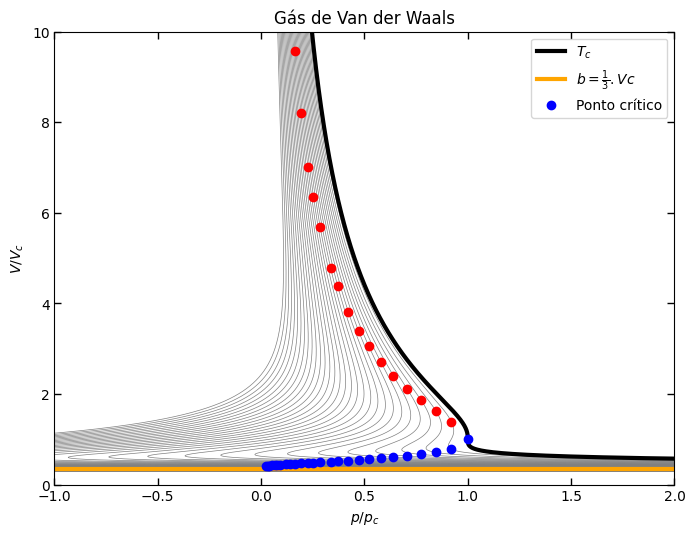

In [ ]:
# Plotagem no gráfico invertido (IGNORAR NO ARTIGO)
rev_V = np.flip(V)
rev_p = np.flip(res,axis=-1)
fig,ax  = plt.subplots(1,1,figsize=(8,6),dpi=100)
ax.tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax.set(ylim=(0,10),xlim=(-1,2))
ax.set(ylabel=r'$V/V_c$',xlabel=r'$p/p_c$',title='Gás de Van der Waals')
for k in range(20,50):
  ax.plot(rev_p[k],rev_V,c='grey',lw=0.5)
ax.plot(rev_p[50],rev_V,c='k',lw=3,label='$T_c$')
ax.axhline(y=1/3, label=r'$b = \frac{1}{3} . Vc$', c='orange',lw=3)
ax.plot(1,1,'o',c='b',label=f'Ponto crítico')
ax.legend(loc='upper right')
for t,(i,k) in Bidx:
  ax.plot(rev_p[t][i],rev_V[i],'ro',label=f'B')
  ax.plot(rev_p[t][i],rev_V[k],'bo',label=f'B')

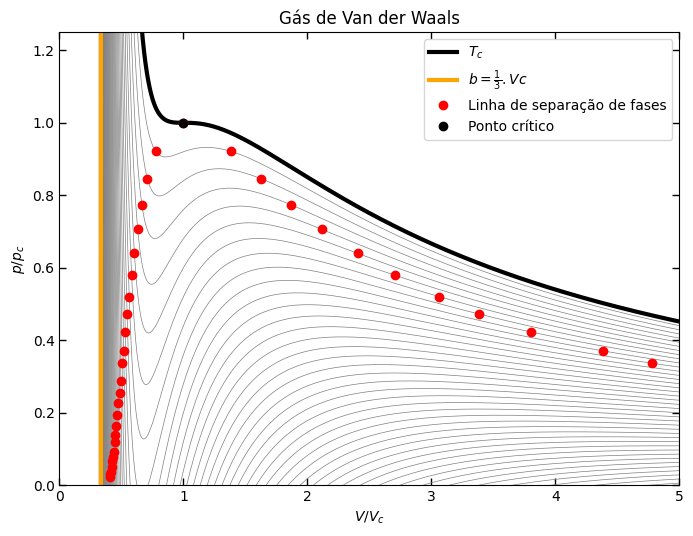

In [ ]:
# Plotamos os resultados obtidos anteriormene num gráfico p por V tal qual o primeiro, destacando a linha de mudança de fase
rev_V = np.flip(V)
rev_p = np.flip(res,axis=-1)
fig,ax  = plt.subplots(1,1,figsize=(8,6),dpi=100)
ax.tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax.set(xlim=(0,5),ylim=(0,1.25))
ax.set(xlabel=r'$V/V_c$',ylabel=r'$p/p_c$',title='Gás de Van der Waals')
for k in range(50):
  ax.plot(rev_V,rev_p[k],c='grey',lw=0.5)
ax.plot(rev_V,rev_p[50],c='k',lw=3,label='$T_c$')
ax.axvline(x=1/3, label=r'$b = \frac{1}{3} . Vc$', c='orange',lw=3)
ax.plot(1,1,'ro',label = 'Linha de separação de fases')
ax.plot(1,1,'o',c='k',label=f'Ponto crítico')
for t,(i,k) in Bidx:
  ax.plot(rev_V[i],rev_p[t][i],'ro')
  ax.plot(rev_V[k],rev_p[t][i],'ro')
ax.legend(loc='upper right')
plt.savefig('fig3 - Linha Fases ',dpi=100)

In [ ]:
# Redefinimos as variáveis tal qual anteriormente
V = np.linspace(0.25,20,10000)
T = np.linspace(0,1,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpVDW(V,t))
rev_V = np.flip(V)
rev_p = np.flip(res,axis=-1)
print(np.shape(res))
print(np.shape(rev_p))

# Agora faremos a mesma operação definida anteriormente, porém generalizando para todos os T , definimos uma matriz 'a' que guarda o G para cada T
a = np.zeros(shape=(51,10000))
print(np.shape(a))
for k in range(51):  
  for i,v in enumerate(rev_V):
    a[k][i] = spit.trapz(rev_V[0:i],rev_p[k][0:i])
print(np.shape(a))

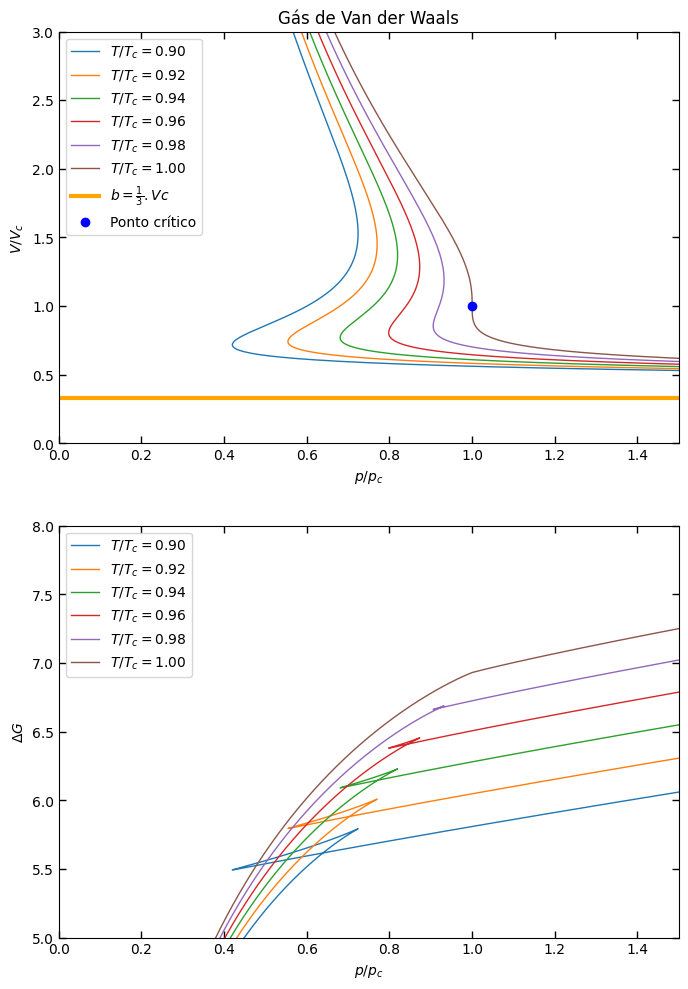

In [ ]:
# Semelhante ao gráfico anterior, porém aqui escolhe vários valores de T para apresentação

fig,ax  = plt.subplots(2,1,figsize=(8,12),dpi=100)
ax[0].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax[0].set(ylim=(0,3),xlim=(0,1.5))
ax[0].set(ylabel=r'$V/V_c$',xlabel=r'$p/p_c$',title='Gás de Van der Waals')
for k in range(45,51,1):
  ax[0].plot(rev_p[k],rev_V,lw=1,label=f'$T/T_c = {T[k]:.2f}$')
#ax[0].plot(rev_p[50],rev_V,c='k',lw=3,label='$T_c$')
ax[0].axhline(y=1/3, label=r'$b = \frac{1}{3} . Vc$', c='orange',lw=3)
ax[0].plot(1,1,'o',c='b',label=f'Ponto crítico')
ax[0].legend(loc='upper left')

ax[1].set(ylim=(5,8),xlim=(0,1.5))
ax[1].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
for k in range(45,51,1):
  ax[1].plot(rev_p[k],a[k][:],lw=1,label=f'$T/T_c = {T[k]:.2f}$')
ax[1].set(ylabel=r'$\Delta G$',xlabel=r'$p/p_c$')
ax[1].legend()
plt.savefig('fig4 - Varias G por p',dpi=100)

GÁS DE DIETERICI

In [ ]:
# Determinar a Temperatura Crítica (Tc) para o gás de Dieterici
# Para o Gás O2
a = 1.360
b = 0.03183
R = 0.0820574587
Tc = 8*a/(27*R*b)
Pc = a/(27*b**2)
Vc = 3*b

In [ ]:
# Define a equação de estado para o gás de Dieterici
def pDie(V,T):
  return T*np.exp(2 - 2/(T*V))/(2*V-1)
vpDie = np.vectorize(pDie)

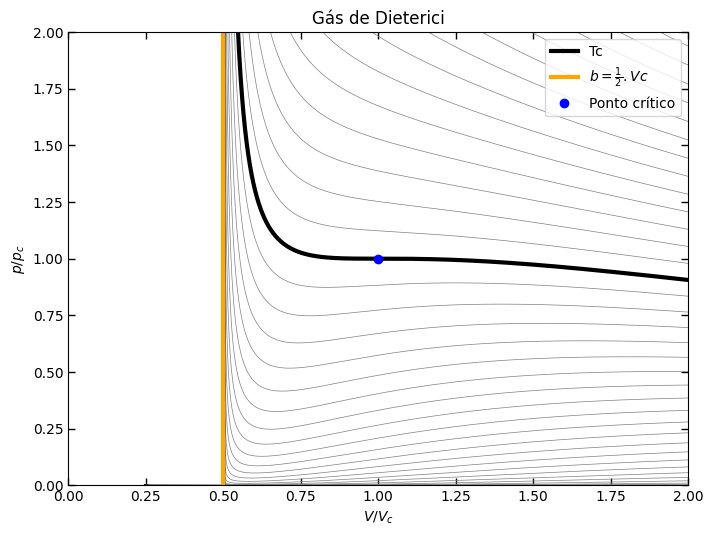

In [ ]:
# Inicializa as variáveis V e T e constrói o conjunto da variável p(V,T)
V = np.linspace(0.25,5,10000)
T = np.linspace(0.12,2.12,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpDie(V,t))

# Plota o resultado
fig,ax  = plt.subplots(figsize=(8,6),dpi=100)
ax.set(ylim=(0,2),xlim=(0,2))
ax.set(xlabel=r'$V/V_c$',ylabel=r'$p/p_c$',title='Gás de Dieterici')
for i in range(len(res)):
  ax.plot(V,res[i],c='gray',lw=0.5)
ax.tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax.plot(V,vpDie(V,1.),c='k',lw=3,label=f'Tc')
ax.axvline(x=1/2, label=r'$b = \frac{1}{2} . Vc$', c='orange',lw=3)
ax.plot(1.,1.,'o',c='b',label=f'Ponto crítico')
ax.legend(loc='upper right')
plt.savefig('fig1DIE - isotermas',dpi=100)

In [ ]:
# Redefine as variáveis e escolhemos um T específico
V = np.linspace(0.25,10,10000)
T = np.linspace(0.5,1,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpDie(V,t))
t = 45

# Inverte a ordem das listas, necessário para integração numérica
rev_V = np.flip(V)
rev_p = np.flip(res[t])
print(T[t])
# Realiza a integração nuérica
resI=[]
for i,v in enumerate(rev_V):
  resI.append(spit.trapz(rev_V[0:i],rev_p[0:i]))
# Encontra os pontos extremos X e Y
imax = argrelextrema(rev_p, np.greater)
imin = argrelextrema(rev_p, np.less)
# Encontra os pontos B
idx=[]
erro_min = 1e10
for i,g in enumerate(resI[0:imax[0][0]]):
  for k,gg in enumerate(resI[imin[0][0]:]):
    erro = (gg-g)**2 + (-rev_p[i]+rev_p[k+imin[0][0]])**2
    if erro < erro_min:
      erro_min=erro
      idx.append((i,k+imin[0][0],erro_min,abs(gg-g),abs(-rev_p[i]+rev_p[k+imin[0][0]])))
idx
bidx = idx[-1]
print(bidx)

0.95
(8653, 9521, 9.96202136054283e-09, 4.0426508590041266e-05, 9.125633547191203e-05)


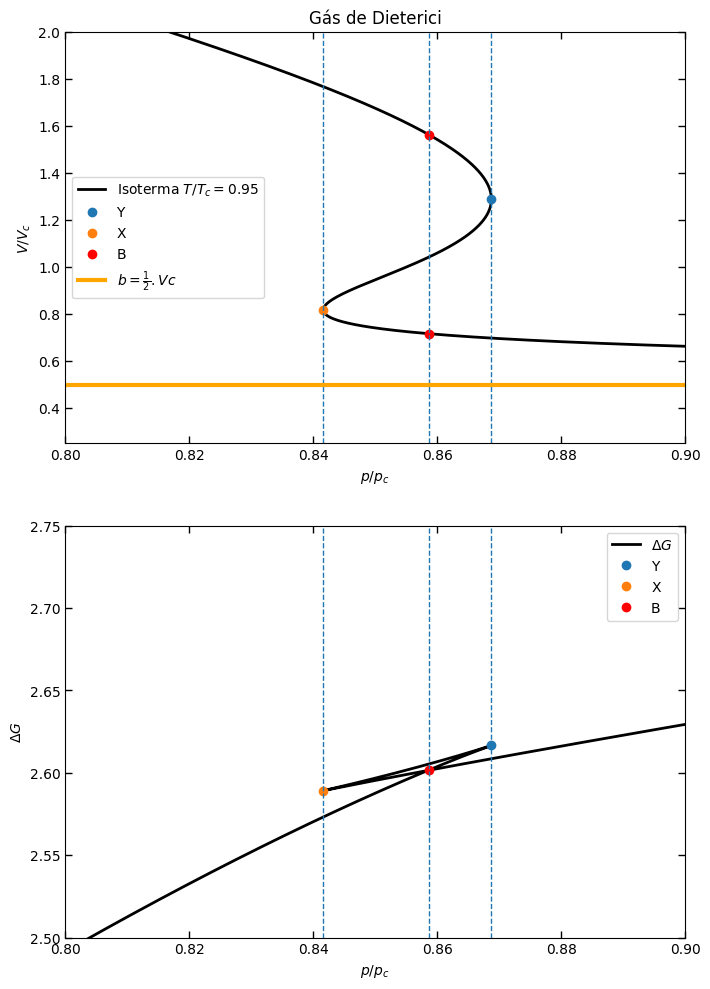

In [ ]:
# Plota os gráficos de V por p e de G por p
fig,ax  = plt.subplots(2,1,figsize=(8,12),dpi=100)
i,k,_,_,_ = bidx
ax[0].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax[0].set(ylabel=r'$V/V_c$',xlabel=r'$p/p_c$',title='Gás de Dieterici')
ax[0].plot(rev_p,rev_V,c='k',lw=2,label=fr'Isoterma $T/T_c = {T[t]:.2f}$')
#ax[0].plot(rev_p,rev_V,'ok',ms = 0.5,label=fr'Isoterma $T/T_c = {T[t]}$')
ax[0].plot(rev_p[imax[0][0]],rev_V[imax[0][0]],'o',label=f'Y')
ax[0].plot(rev_p[imin[0][0]],rev_V[imin[0][0]],'o',label=f'X')
ax[0].plot(rev_p[i],rev_V[i],'or',label=f'B')
ax[0].plot(rev_p[i],rev_V[k],'or')
ax[0].axvline(x=rev_p[imax[0][0]],ls='--',lw=1)
ax[0].axvline(x=rev_p[imin[0][0]],ls='--',lw=1)
ax[0].axvline(x=rev_p[i],ls='--',lw=1)
ax[0].axhline(y=1/2, label=r'$b = \frac{1}{2} . Vc$', c='orange',lw=3)
ax[0].legend()

ax[1].set(ylim=(0,1),xlim=(0.5,1))
ax[1].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax[1].plot(rev_p,resI,c='k',lw=2,label=fr'$\Delta G$')
#ax[1].plot(rev_p,resI,'ok',ms=0.5,label=fr'$\Delta G$')
ax[1].plot(rev_p[imax[0][0]],resI[imax[0][0]],'o',label=f'Y')
ax[1].plot(rev_p[imin[0][0]],resI[imin[0][0]],'o',label=f'X')
ax[1].plot(rev_p[i],resI[i],'or',label='B')
ax[1].axvline(x=rev_p[imax[0][0]],ls='--',lw=1)
ax[1].axvline(x=rev_p[imin[0][0]],ls='--',lw=1)
ax[1].axvline(x=rev_p[i],ls='--',lw=1)
ax[1].set(ylabel=r'$\Delta G$',xlabel=r'$p/p_c$')
ax[1].legend()
# Pode ser necessário ajuste manual dos limites do gráfico para ótima apresentação
xmin = 0.8
xmax = 0.9
yminV = 0.25
ymaxV = 2
yminG = 2.50
ymaxG = 2.75
ax[0].set(ylim=(yminV,ymaxV),xlim=(xmin,xmax))
ax[1].set(ylim=(yminG,ymaxG),xlim=(xmin,xmax))
plt.savefig(f'fig2DIE - G por P T = {int(T[t]*100)}',dpi=100)

In [ ]:
# Nesta parte é repetido o código anterior, porém calculando para uma faixa de valores de T
tt = range(25,50)
Bidx=[]
for t in tt:
  rev_V = np.flip(V)
  rev_p = np.flip(res[t])
  resI=[]
  for i,v in enumerate(rev_V):
    resI.append(spit.trapz(rev_V[0:i],rev_p[0:i]))
  imax = argrelextrema(rev_p, np.greater)
  imin = argrelextrema(rev_p, np.less)
  idx=[]
  idxf=[]
  erro_min = 1e5
  for i,g in enumerate(resI[0:imax[0][0]]):
    for k,gg in enumerate(resI[imin[0][0]:]):
      erro = (gg-g)**2 + (-rev_p[i]+rev_p[k+imin[0][0]])**2
      if erro < erro_min:
        erro_min=erro
        idx.append((i,k+imin[0][0],erro_min,abs(gg-g),abs(-rev_p[i]+rev_p[k+imin[0][0]])))
  bidx = idx[-1]
  Bidx.append((t,(bidx[0],bidx[1]))) 
print(Bidx)

[(25, (6902, 9693)), (26, (7001, 9689)), (27, (7104, 9685)), (28, (7209, 9681)), (29, (7299, 9676)), (30, (7392, 9671)), (31, (7490, 9666)), (32, (7575, 9660)), (33, (7665, 9654)), (34, (7759, 9648)), (35, (7845, 9641)), (36, (7925, 9633)), (37, (8010, 9625)), (38, (8091, 9616)), (39, (8170, 9606)), (40, (8255, 9596)), (41, (8332, 9584)), (42, (8412, 9571)), (43, (8489, 9556)), (44, (8572, 9540)), (45, (8653, 9521)), (46, (8734, 9498)), (47, (8819, 9470)), (48, (8914, 9435)), (49, (9019, 9382))]


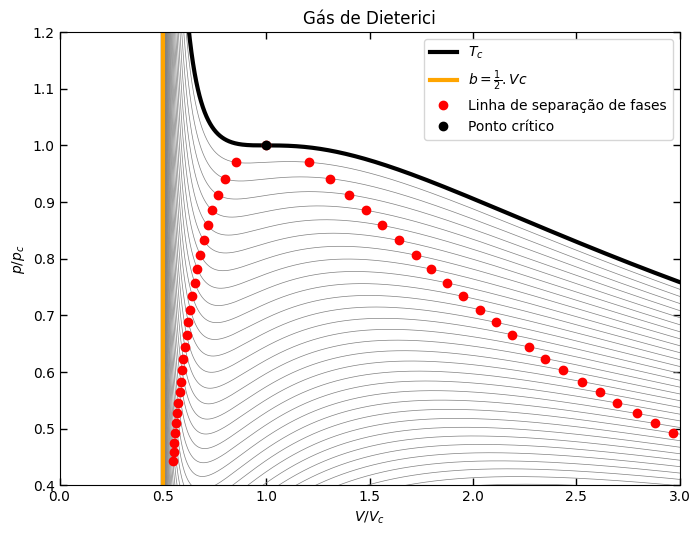

In [ ]:
# Plotamos os resultados obtidos anteriormene num gráfico p por V tal qual o primeiro, destacando a linha de mudança de fase
rev_V = np.flip(V)
rev_p = np.flip(res,axis=-1)
fig,ax  = plt.subplots(1,1,figsize=(8,6),dpi=100)
ax.tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax.set(xlim=(0,3),ylim=(0.4,1.2))
ax.set(xlabel=r'$V/V_c$',ylabel=r'$p/p_c$',title='Gás de Dieterici')
for k in range(50):
  ax.plot(rev_V,rev_p[k],c='grey',lw=0.5)
ax.plot(rev_V,rev_p[50],c='k',lw=3,label='$T_c$')
ax.axvline(x=1/2, label=r'$b = \frac{1}{2} . Vc$', c='orange',lw=3)
ax.plot(1,1,'ro',label = 'Linha de separação de fases')
ax.plot(1,1,'o',c='k',label=f'Ponto crítico')
for t,(i,k) in Bidx:
  ax.plot(rev_V[i],rev_p[t][i],'ro')
  ax.plot(rev_V[k],rev_p[t][i],'ro')
ax.legend(loc='upper right')
plt.savefig('fig3DIE - Linha Fases ',dpi=100)

In [ ]:
# Redefinimos as variáveis tal qual anteriormente
V = np.linspace(0.25,10,10000)
T = np.linspace(0.5,1,51,endpoint=True)
res=[]
for i,t in enumerate(T):
  res.append(vpDie(V,t))
rev_V = np.flip(V)
rev_p = np.flip(res,axis=-1)
print(np.shape(res))
print(np.shape(rev_p))

# Agora faremos a mesma operação definida anteriormente, porém generalizando para todos os T , definimos uma matriz 'a' que guarda o G para cada T
a = np.zeros(shape=(51,10000))
print(np.shape(a))
for k in range(51):  
  for i,v in enumerate(rev_V):
    a[k][i] = spit.trapz(rev_V[0:i],rev_p[k][0:i])
print(np.shape(a))

(51, 10000)
(51, 10000)
(51, 10000)
(51, 10000)


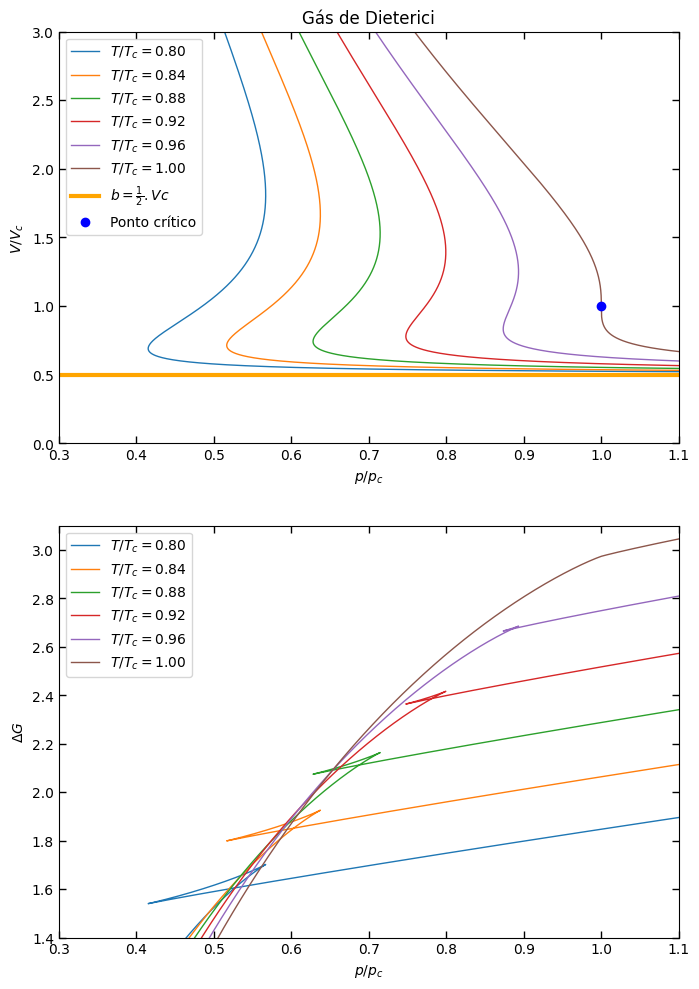

In [ ]:
# Semelhante ao gráfico anterior, porém aqui escolhe vários valores de T para apresentação

fig,ax  = plt.subplots(2,1,figsize=(8,12),dpi=100)
ax[0].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
ax[0].set(ylim=(0,3),xlim=(0.3,1.1))
ax[0].set(ylabel=r'$V/V_c$',xlabel=r'$p/p_c$',title='Gás de Dieterici')
for k in range(30,51,4):
  ax[0].plot(rev_p[k],rev_V,lw=1,label=f'$T/T_c = {T[k]:.2f}$')
#ax[0].plot(rev_p[50],rev_V,c='k',lw=3,label='$T_c$')
ax[0].axhline(y=1/2, label=r'$b = \frac{1}{2} . Vc$', c='orange',lw=3)
ax[0].plot(1,1,'o',c='b',label=f'Ponto crítico')
ax[0].legend()

ax[1].set(ylim=(1.4,3.1),xlim=(0.3,1.1))
ax[1].tick_params(direction='in',length=5, width = 1 , right = 'on' , top = 'on')
for k in range(30,51,4):
  ax[1].plot(rev_p[k],a[k][:],lw=1,label=f'$T/T_c = {T[k]:.2f}$')
ax[1].set(ylabel=r'$\Delta G$',xlabel=r'$p/p_c$')
ax[1].legend()
plt.savefig('fig4DIE - Varias G por p',dpi=100)